TITLE :- CROP RECOMMENDATION SYSTEM 

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("C:\\Users\\joseph\\Downloads\\Crop_recommendation.csv")

In [37]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.size

17600

In [5]:
df.shape

(2200, 8)

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df['label'].value_counts()

mungbean       100
pomegranate    100
mango          100
coconut        100
papaya         100
mothbeans      100
coffee         100
rice           100
blackgram      100
lentil         100
maize          100
pigeonpeas     100
grapes         100
kidneybeans    100
orange         100
apple          100
jute           100
muskmelon      100
chickpea       100
banana         100
watermelon     100
cotton         100
Name: label, dtype: int64

In [9]:
# checking null values of each columns
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Heat Map :- A heatmap is used to visualize and represent data values in a matrix or table format using color gradients. It helps identify patterns, correlations, and variations in the data by assigning colors to data points, making it easier to spot trends and relationships at a glance. Heatmaps are commonly used in data analysis and visualization to reveal insights and make data more interpretable.

<AxesSubplot:>

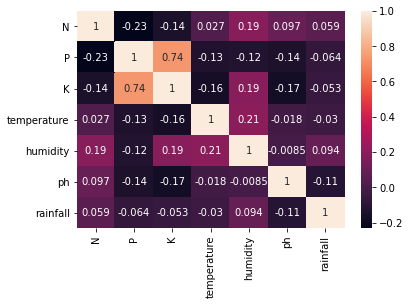

In [11]:
sns.heatmap(df.corr(),annot=True)

Count Plot :- the code below essentially sets the color palette, configures the figure size, and then creates a countplot of the 'label' column from the DataFrame df. This countplot will show how many times each unique label appears in the dataset.

<AxesSubplot:xlabel='label', ylabel='count'>

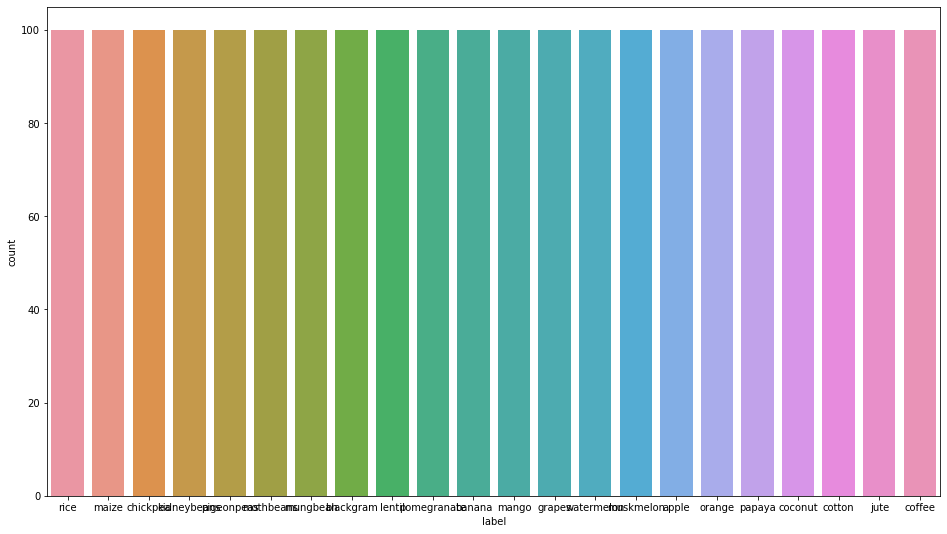

In [12]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [13]:
import scipy.stats as stats

In [14]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color = 'pink')
    
    plt.show()

Statistical Plot :- By analyzing these three plots together, we can gain insights into the data's distribution (histogram), assess its normality (probability plot), and understand its central tendency, spread, and presence of outliers (box plot). These visualizations are valuable for initial data exploration and can inform subsequent data analysis and modeling decisions.

 Statistical plots for : N is shown ↓


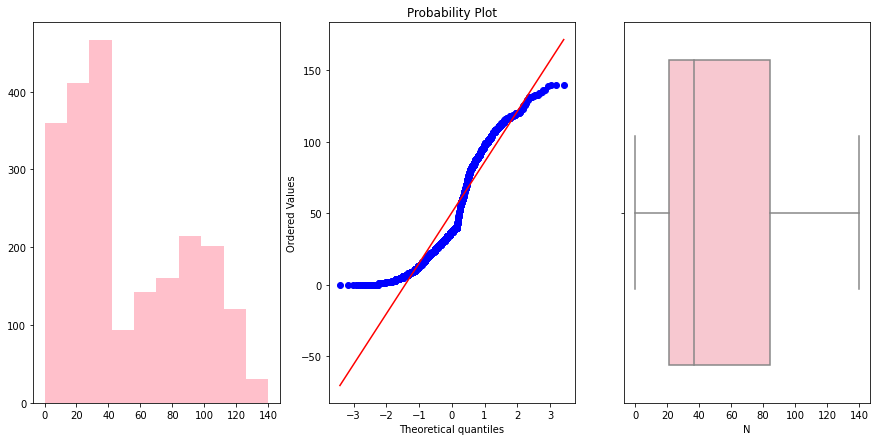

------------------------------------------------------------
 Statistical plots for : P is shown ↓


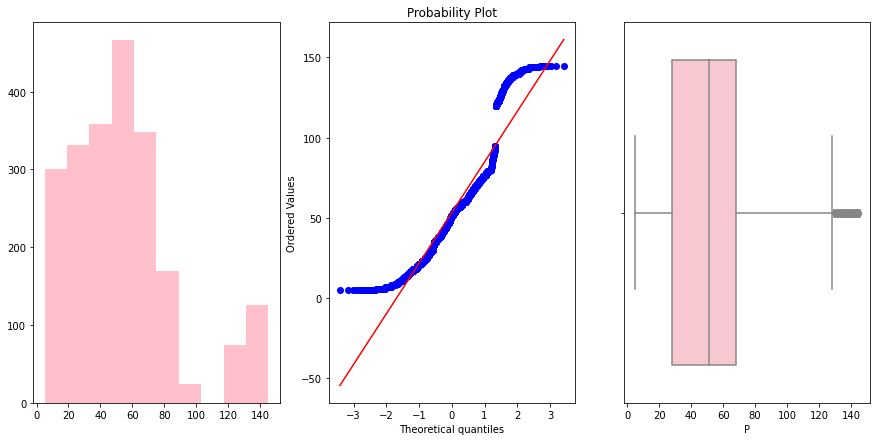

------------------------------------------------------------
 Statistical plots for : K is shown ↓


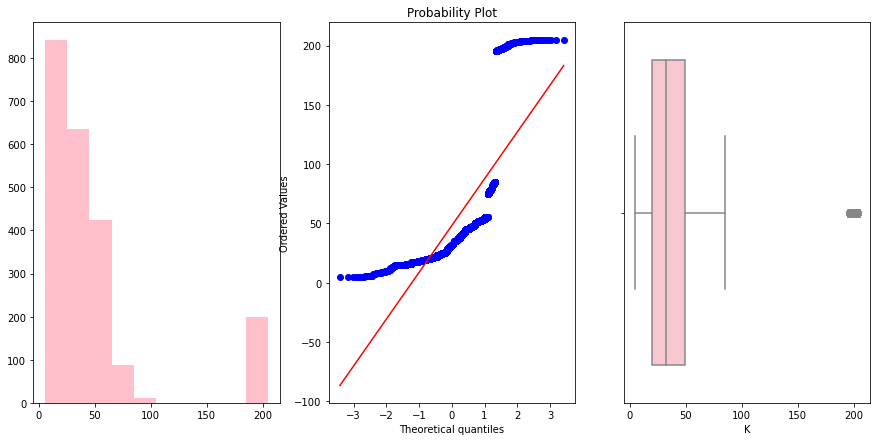

------------------------------------------------------------
 Statistical plots for : temperature is shown ↓


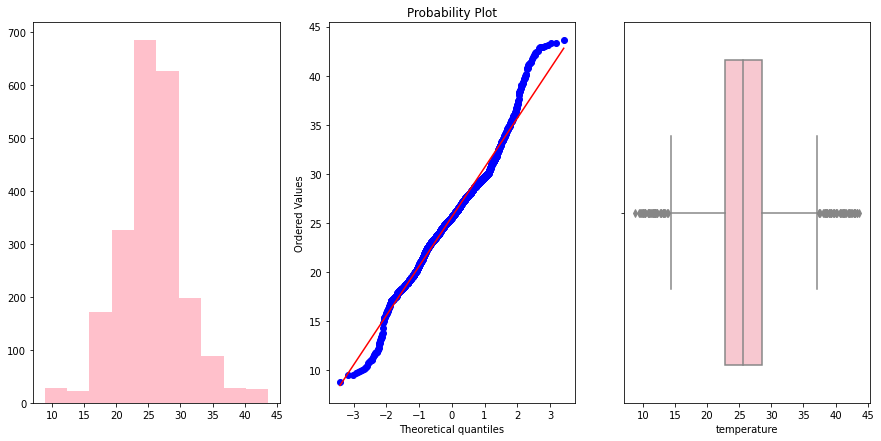

------------------------------------------------------------
 Statistical plots for : humidity is shown ↓


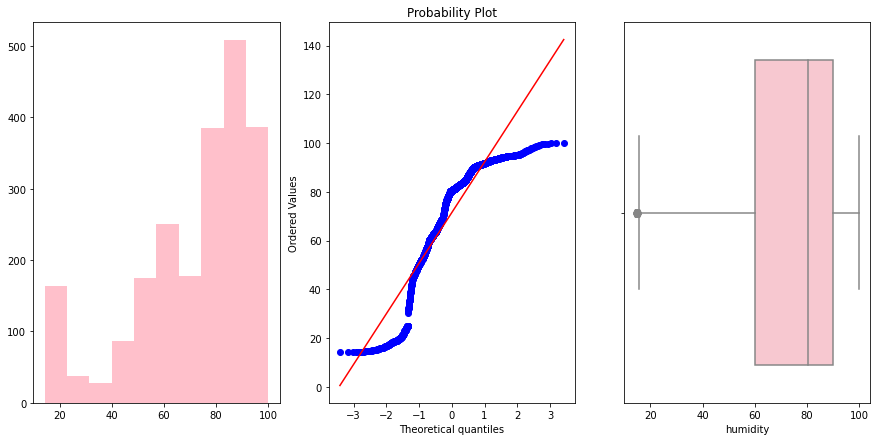

------------------------------------------------------------
 Statistical plots for : ph is shown ↓


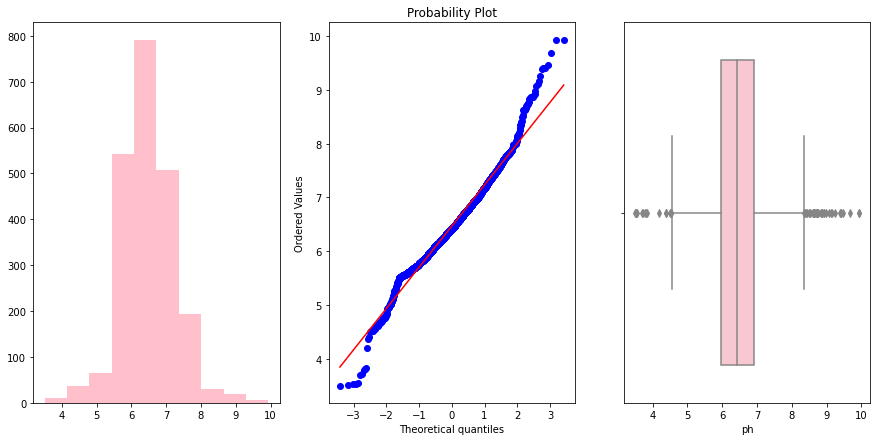

------------------------------------------------------------
 Statistical plots for : rainfall is shown ↓


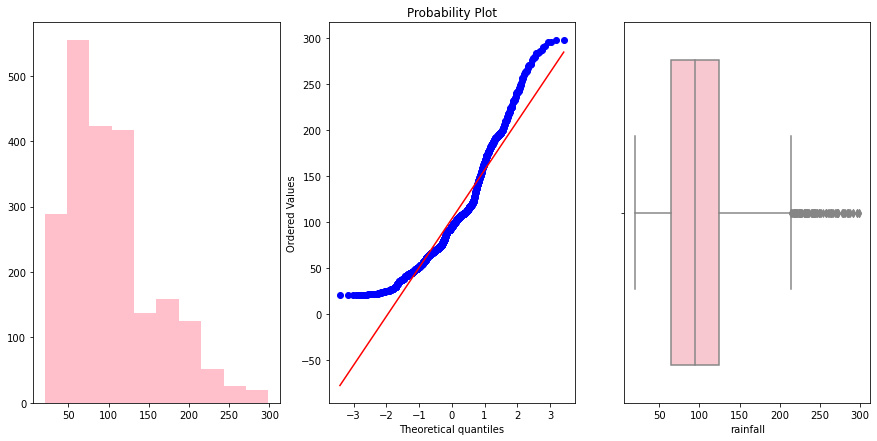

------------------------------------------------------------


In [15]:
for i in df.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(df,i)
    print("-"*60)

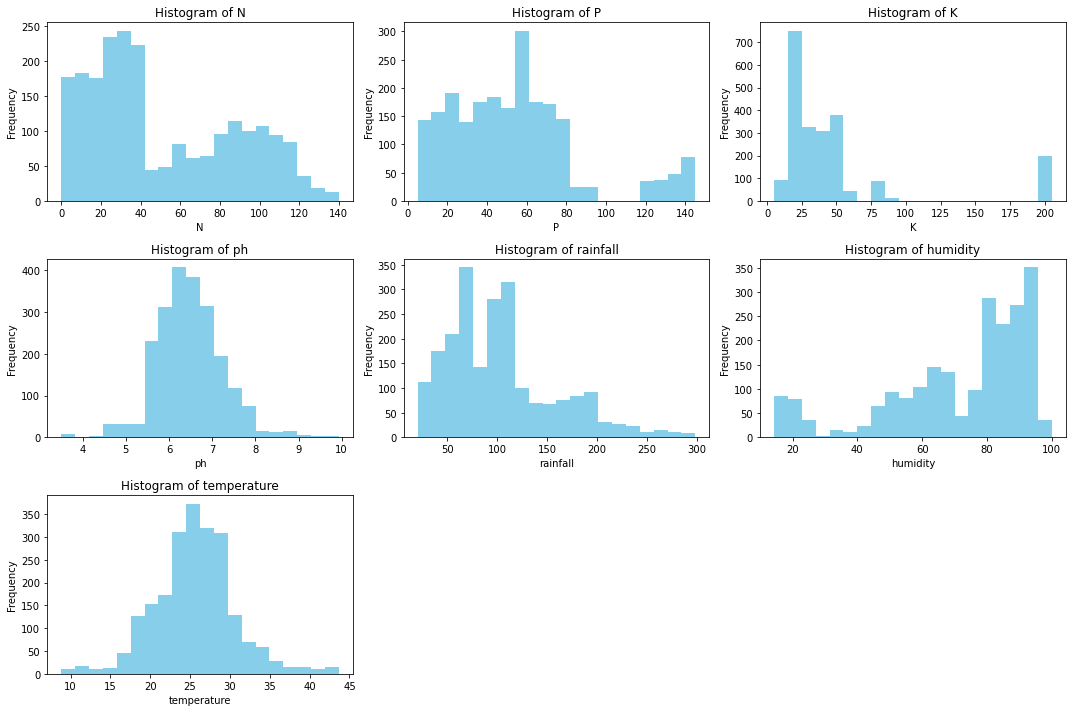

In [16]:
# Create histograms for numeric attributes
numeric_attributes = ['N', 'P', 'K', 'ph', 'rainfall', 'humidity', 'temperature']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(numeric_attributes):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[attribute], bins=20, color='skyblue')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attribute}')

plt.tight_layout()
plt.show()


Box Plot :- The below code creates a box plot for three nutrient attributes ('N', 'P', 'K') in the dataset. It adjusts the figure size, uses Seaborn to create the box plot with a pastel color palette, labels the axes and title, and displays the plot. The box plot helps visualize the distribution and summary statistics of these nutrient levels. A box plot, in a simple way, is used to display the distribution and key statistics (median, quartiles, potential outliers) of a numeric dataset, helping you understand the spread and central tendency of the data at a glance.

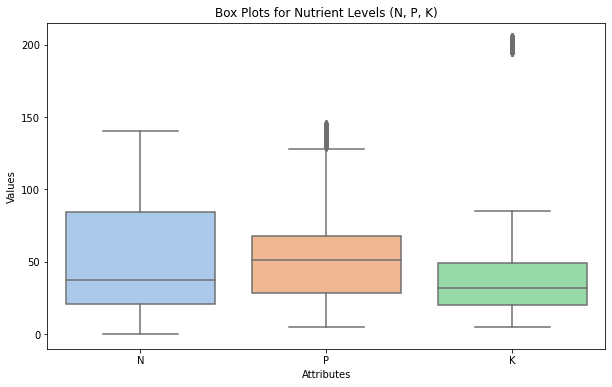

In [17]:
# Create box plots for numeric attributes 'n', 'p', and 'k'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['N', 'P', 'K']], palette='pastel')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Box Plots for Nutrient Levels (N, P, K)')
plt.show()

In [55]:
df = df.sample(frac=1, random_state=5)
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [56]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
309,27,59,22,21.811676,23.205912,5.794159,130.060809,kidneybeans
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple
295,57,56,78,17.341502,18.756263,8.861480,67.954543,chickpea
533,7,56,23,26.339088,40.009334,5.545219,55.504292,mothbeans
1998,107,58,15,23.738680,75.775038,7.556064,76.636692,cotton
...,...,...,...,...,...,...,...,...
821,13,61,24,18.297836,69.689762,7.629910,49.391115,lentil
1103,25,22,25,33.561502,45.535566,5.977414,95.705259,mango
1767,45,58,49,30.107734,90.345464,6.827813,75.245220,papaya
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example of hyperparameter tuning using GridSearchCV with a RandomForestClassifier

# Assuming 'features' is your feature data and 'target' is your target labels
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(features, target)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'n_estimators': 200}


In [70]:
from sklearn.ensemble import BaggingClassifier

# Example of using BaggingClassifier as an ensemble method

# Assuming 'features' is your feature data and 'target' is your target labels
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bagging_clf.fit(features, target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

# Example of polynomial feature engineering

# Assuming 'features' is your feature data
poly = PolynomialFeatures(degree=2)
features_poly = poly.fit_transform(features)

In [87]:
# Initializing empty lists to append all model's name and corresponding name
acc = []

model = []

In [88]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.05,random_state =2)

In [89]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  94.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         5
   blackgram       0.67      1.00      0.80         2
    chickpea       1.00      1.00      1.00         5
     coconut       1.00      1.00      1.00         6
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         3
      grapes       1.00      1.00      1.00         6
        jute       0.00      0.00      0.00         3
 kidneybeans       1.00      1.00      1.00         5
      lentil       0.83      1.00      0.91         5
       maize       1.00      1.00      1.00         6
       mango       1.00      0.80      0.89         5
   mothbeans       1.00      0.33      0.50         3
    mungbean       1.00      1.00      1.00         1
   muskmelon       1.00      1.00      1.00         8
      orange       1.00      1.00

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
score = cross_val_score(DecisionTree, features, target,cv=10)

In [92]:
score

array([0.91818182, 0.92272727, 0.91818182, 0.92727273, 0.92727273,
       0.92727273, 0.93636364, 0.95454545, 0.92272727, 0.91818182])

In [93]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         5
   blackgram       1.00      1.00      1.00         2
    chickpea       1.00      1.00      1.00         5
     coconut       1.00      1.00      1.00         6
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         3
      grapes       1.00      1.00      1.00         6
        jute       1.00      1.00      1.00         3
 kidneybeans       1.00      1.00      1.00         5
      lentil       1.00      1.00      1.00         5
       maize       1.00      1.00      1.00         6
       mango       1.00      1.00      1.00         5
   mothbeans       1.00      1.00      1.00         3
    mungbean       1.00      1.00      1.00         1
   muskmelon       1.00      1.00      1.00         8
      orange       1.00      1.00      1.00      

In [94]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.98863636, 0.99772727, 0.99772727])

In [95]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         5
   blackgram       1.00      1.00      1.00         2
    chickpea       1.00      1.00      1.00         5
     coconut       1.00      1.00      1.00         6
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         3
      grapes       1.00      1.00      1.00         6
        jute       1.00      1.00      1.00         3
 kidneybeans       1.00      1.00      1.00         5
      lentil       1.00      1.00      1.00         5
       maize       1.00      1.00      1.00         6
       mango       1.00      1.00      1.00         5
   mothbeans       1.00      1.00      1.00         3
    mungbean       1.00      1.00      1.00         1
   muskmelon       1.00      1.00      1.00         8
      orange       1.00      1.00      1.00         4
    

In [96]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99545455, 0.99772727, 0.99318182])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

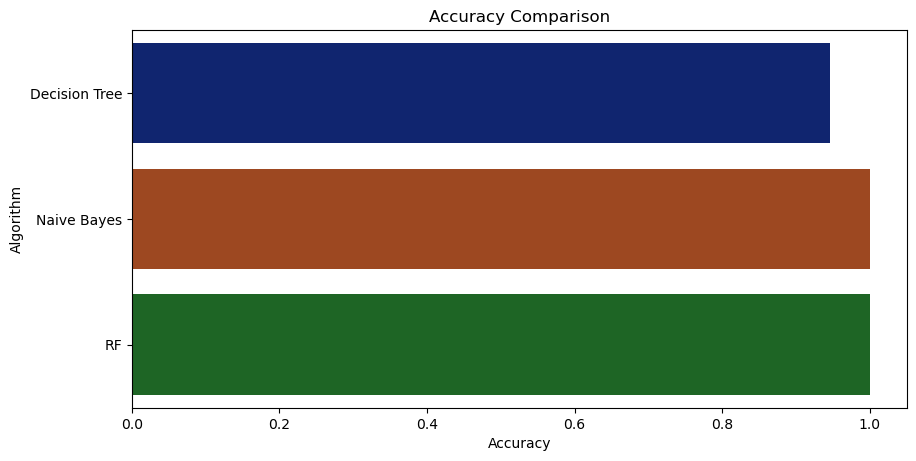

In [97]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [98]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9454545454545454
Naive Bayes --> 1.0
RF --> 1.0


In [99]:
# Create sample data
data = np.array([[36,64.1,20.8,27.84806561,38.77621951,5.949949081,137.0984171]])

# Make predictions
prediction_nb = NaiveBayes.predict(data)
prediction_rf = RF.predict(data)
prediction_dt = DecisionTree.predict(data)

print("Naive Bayes Prediction:", prediction_nb)
print("Random Forest Prediction:", prediction_rf)
print("Decision Tree Prediction:", prediction_dt)

Naive Bayes Prediction: ['pigeonpeas']
Random Forest Prediction: ['pigeonpeas']
Decision Tree Prediction: ['pigeonpeas']


In [100]:
test_crop = np.array([[[36,64.1,20.8,27.84806561,38.77621951,5.949949081,137.0984171],
                      [74,35,40,26.49109635,80.15836264,6.980400905,242.8640342],
                      [33,24.1,0.8,17.84806561,30.77621951,5.949949081,37.0984171]]])
for i in range(test_crop.shape[1]):
    reshaped_data = test_crop[0, i].reshape(1, -1)
    prediction_nb = NaiveBayes.predict(reshaped_data)
    prediction_rf = RF.predict(reshaped_data)
    prediction_dt = DecisionTree.predict(reshaped_data)
    
    print("Random Forest Prediction for data",i+1,"is", prediction_rf)
    print("Decision Tree Prediction for data",i+1,"is", prediction_dt)
    print("Naive Bayes Prediction for data", i+1,"is", prediction_nb)
    

Random Forest Prediction for data 1 is ['pigeonpeas']
Decision Tree Prediction for data 1 is ['pigeonpeas']
Naive Bayes Prediction for data 1 is ['pigeonpeas']
Random Forest Prediction for data 2 is ['rice']
Decision Tree Prediction for data 2 is ['rice']
Naive Bayes Prediction for data 2 is ['rice']
Random Forest Prediction for data 3 is ['mothbeans']
Decision Tree Prediction for data 3 is ['mothbeans']
Naive Bayes Prediction for data 3 is ['mothbeans']


In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the Gradient Boosting Machine model
GBM = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0)

# Train the model
GBM.fit(Xtrain, Ytrain)

# Make predictions
predicted_values = GBM.predict(Xtest)

# Calculate accuracy
x = accuracy_score(Ytest, predicted_values)
print("Gradient Boosting Machine's Accuracy is: ", x*100)

# Print classification report
print(classification_report(Ytest, predicted_values))


Gradient Boosting Machine's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         5
   blackgram       1.00      1.00      1.00         2
    chickpea       1.00      1.00      1.00         5
     coconut       1.00      1.00      1.00         6
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         3
      grapes       1.00      1.00      1.00         6
        jute       1.00      1.00      1.00         3
 kidneybeans       1.00      1.00      1.00         5
      lentil       1.00      1.00      1.00         5
       maize       1.00      1.00      1.00         6
       mango       0.83      1.00      0.91         5
   mothbeans       1.00      0.67      0.80         3
    mungbean       1.00      1.00      1.00         1
   muskmelon       1.00      1.00      1.00         8
      orange       1.0